<a href="https://colab.research.google.com/github/Mhamuda/CSE4211-Artificial_Intelligence_Lab/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary modules

In [31]:
from google.colab import drive
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import vgg16
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading data (label: Badam - 0, Chola - 1)

In [32]:
# Define your directory and categories
DIRECTORY = '/content/drive/MyDrive/AI_Assignment-4 (Dataset)'
#DIRECTORY = "./Classifier Dataset"
CATEGORIES = ["Badam", "Chola"]
# Read and label the data
data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)

    for img in os.listdir(folder):
        image = os.path.join(folder, img)
        image_arr = cv2.imread(image)
        image_arr = cv2.resize(image_arr, (32, 32))
        image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
        data.append([image_arr, label])

Data processing

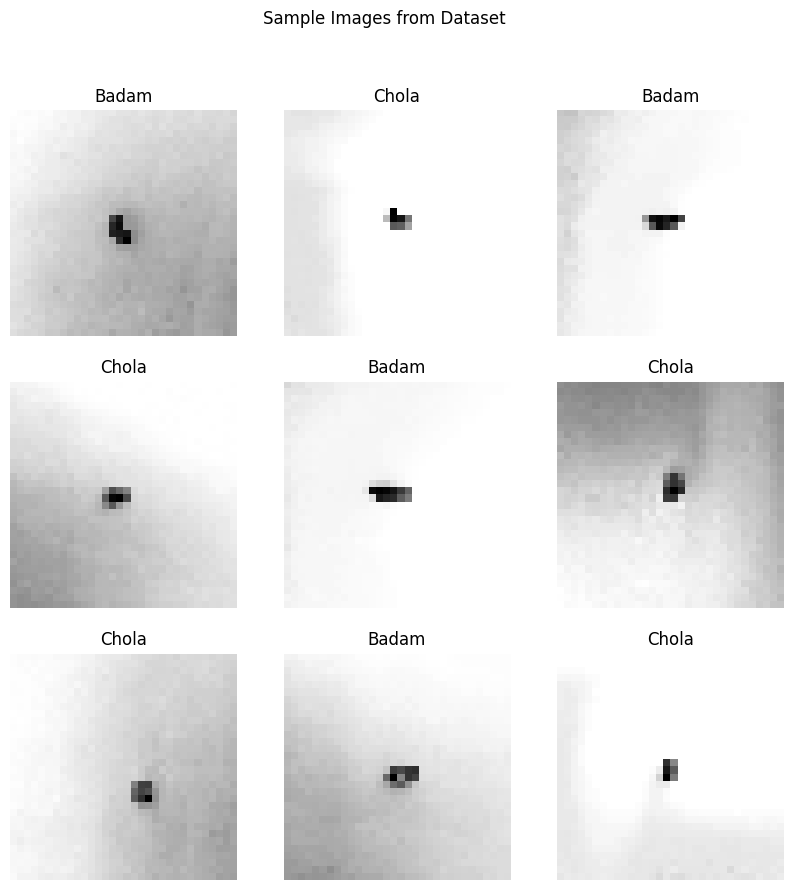

In [33]:
# Shuffle the data
random.shuffle(data)

# Create lists for images and labels
x = []
y = []

# Split data into x (images) and y (labels)
for features, label in data:
    x.append(features)
    y.append(label)

# Convert to numpy arrays
x = np.array(x)
y = np.array(y)


# Function to get class labels
def get_label(label):
    if label == 0:
        return "Badam"
    elif label == 1:
        return "Chola"
    else:
        return "Unknown"


# Display sample images with labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x[i].squeeze(), cmap='gray')  # Display the image
    plt.title(get_label(y[i]))  # Display the corresponding label
    plt.axis("off")
plt.suptitle("Sample Images from Dataset")
plt.show()

Split the data into train, validation, and test sets

In [34]:
# Normalize the image data
x = x / 255.0

# Split the data into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (763, 32, 32)
x_val shape: (85, 32, 32)
x_test shape: (212, 32, 32)
y_train shape: (763,)
y_val shape: (85,)
y_test shape: (212,)


CNN (Convolutional Neural Network) Model Architecture

In [35]:
# input_shape = (256, 256, 3)
# inputs = Input(shape=input_shape)
# x = Conv2D(32, (3, 3), activation="relu")(inputs)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(64, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(128, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(128, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)
# x = Flatten()(x)
# x = Dense(512, activation="relu")(x)
# outputs = Dense(1, activation="sigmoid")(x)
# model = keras.Model(inputs=inputs, outputs=outputs)

# # Compile the model
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


# model.summary()

input_shape = (32, 32, 1)
inputs = Input(shape=input_shape)

# Convolutional layers
x = Conv2D(32, (3, 3), activation="relu")(inputs)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation="relu")(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(128, (3, 3), activation="relu")(x)
x = MaxPooling2D(2, 2)(x)

# Flatten and dense layers
x = Flatten()(x)
x = Dense(128, activation="relu")(x)

# Output layer for binary classification (1 neuron with sigmoid activation)
outputs = Dense(1, activation="sigmoid")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display model summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         7385

In [36]:
# Define a callback to save the model during training
checkpoint_path = "./Save-Model/model_checkpoint.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
)

Fit the model with the defined callback

In [37]:
# Fit the model with the defined callback
history = model.fit(
    x_train,
    y_train,
    epochs=24,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint],
)

Epoch 1/24
18/24 [=====================>........] - ETA: 0s - loss: 0.6925 - accuracy: 0.5122
Epoch 1: val_accuracy improved from -inf to 0.71765, saving model to ./Save-Model/model_checkpoint.h5
24/24 [==============================] - 2s 19ms/step - loss: 0.6891 - accuracy: 0.5531 - val_loss: 0.6732 - val_accuracy: 0.7176
Epoch 2/24
20/24 [========================>.....] - ETA: 0s - loss: 0.6371 - accuracy: 0.6859

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.71765 to 0.75294, saving model to ./Save-Model/model_checkpoint.h5
24/24 [==============================] - 0s 9ms/step - loss: 0.6228 - accuracy: 0.6972 - val_loss: 0.5378 - val_accuracy: 0.7529
Epoch 3/24
20/24 [========================>.....] - ETA: 0s - loss: 0.4691 - accuracy: 0.7625
Epoch 3: val_accuracy improved from 0.75294 to 0.81176, saving model to ./Save-Model/model_checkpoint.h5
24/24 [==============================] - 0s 9ms/step - loss: 0.4671 - accuracy: 0.7628 - val_loss: 0.4536 - val_accuracy: 0.8118
Epoch 4/24
16/24 [===================>..........] - ETA: 0s - loss: 0.5504 - accuracy: 0.7188
Epoch 4: val_accuracy improved from 0.81176 to 0.83529, saving model to ./Save-Model/model_checkpoint.h5
24/24 [==============================] - 0s 10ms/step - loss: 0.5074 - accuracy: 0.7588 - val_loss: 0.4556 - val_accuracy: 0.8353
Epoch 5/24
21/24 [=========================>....] - ETA: 0s - loss: 0.4036 - accuracy: 0.8214
Epoch 5: val_a

Evaluate the model on the test set

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

7/7 [==============================] - 0s 4ms/step - loss: 0.2854 - accuracy: 0.8774

Test Accuracy: 0.8773584961891174


Plotting Accuracy and Loss

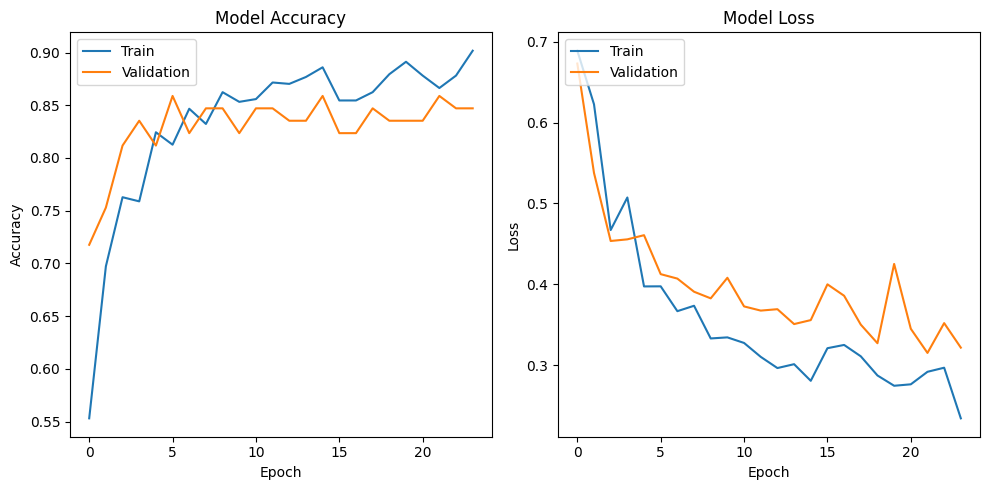

In [39]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.tight_layout()
plt.show()

Confusion matrix

7/7 [==============================] - 0s 3ms/step


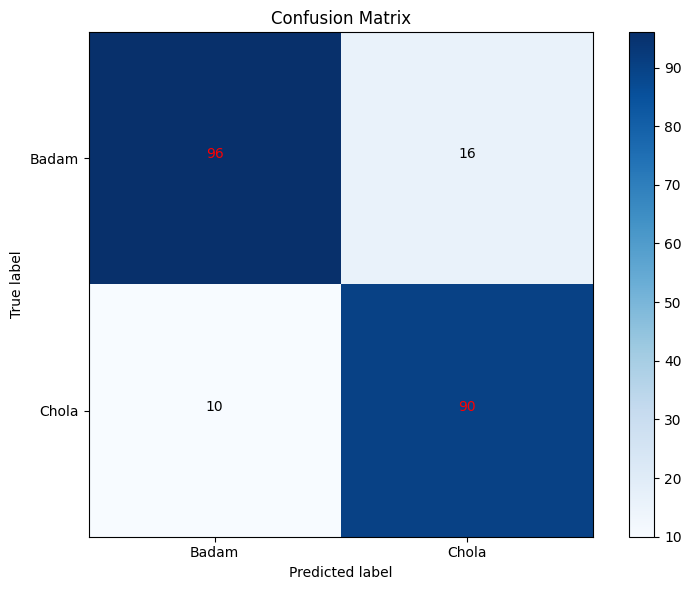

Precision (Chola): 0.8491
Recall (Chola): 0.9000
Specificity (Badam): 0.8571
Accuracy: 0.8774


In [40]:
# Assuming you have predictions and true labels from your test set
y_pred = model.predict(x_test)


# Convert predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)


# Define the function to calculate metrics
def calculate_metrics(confusion_matrix):
    TN = confusion_matrix[0, 0]  # True Negatives
    FP = confusion_matrix[0, 1]  # False Positives
    FN = confusion_matrix[1, 0]  # False Negatives
    TP = confusion_matrix[1, 1]  # True Positives

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)

    return accuracy, precision, recall, specificity


# Calculate metrics
accuracy, precision, recall, specificity = calculate_metrics(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add labels to the plot
classes = ["Badam", "Chola"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            format(cm[i, j], "d"),
            horizontalalignment="center",
            color="red" if cm[i, j] > thresh else "black",
        )

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()

plt.show()

print(f"Precision (Chola): {precision:.4f}")
print(f"Recall (Chola): {recall:.4f}")
print(f"Specificity (Badam): {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Fully connected neural network-based binary classifier

In [41]:
# Define input layer
inputs = keras.Input(shape=(32, 32))  # Assuming input data size of 32x32

# Flatten layer to convert 2D input data to 1D
x = keras.layers.Flatten()(inputs)

# Dense layers
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(128, activation='relu')(x)


# Output layer with sigmoid activation for binary classification
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               131200    
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 512)               131584    
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               3289

Fitting the model

In [42]:
history = model.fit(x_train,y_train, epochs=27, validation_data=(x_val, y_val))


Epoch 1/27
24/24 [==============================] - 2s 14ms/step - loss: 0.7156 - accuracy: 0.4902 - val_loss: 0.6954 - val_accuracy: 0.5059
Epoch 2/27
24/24 [==============================] - 0s 8ms/step - loss: 0.6960 - accuracy: 0.4928 - val_loss: 0.6920 - val_accuracy: 0.5294
Epoch 3/27
24/24 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5308 - val_loss: 0.6976 - val_accuracy: 0.5059
Epoch 4/27
24/24 [==============================] - 0s 7ms/step - loss: 0.6939 - accuracy: 0.4836 - val_loss: 0.6934 - val_accuracy: 0.4941
Epoch 5/27
24/24 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.4928 - val_loss: 0.6933 - val_accuracy: 0.4941
Epoch 6/27
24/24 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.4862 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 7/27
24/24 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 8/27
24/24 [=

Ploting the training & validation accuracy values

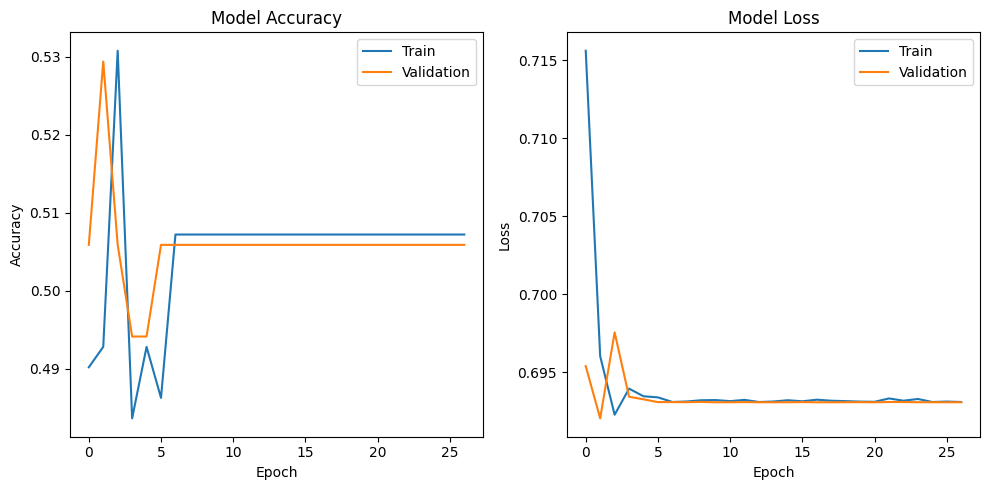

In [51]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"])

plt.tight_layout()
plt.show()

Evaluate the model

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

7/7 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.4717

Test Accuracy: 0.4716981053352356


Predict and plot the model

7/7 [==============================] - 0s 5ms/step


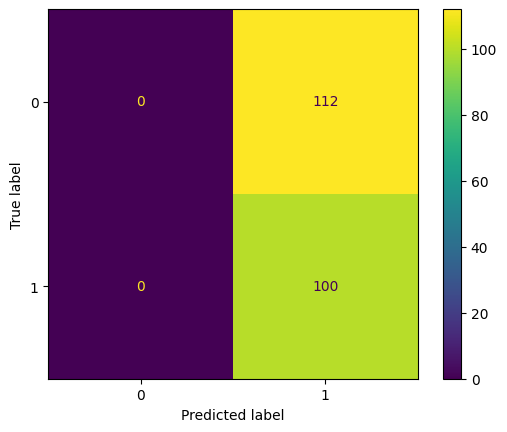

In [46]:
predicted = model.predict(x_test)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = y_test
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()